In [135]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.feature_selection import RFE


In [136]:
# Load Data
def Load_data():
    data = pd.read_csv('sobar-72(classification).csv')
    return data

data_copy = Load_data().copy()

In [137]:
# Data Cleaning
def CleanFunc(data):
    # Impute missing values (mean/mode imputation)
    for column in data.columns:
        if data[column].dtype == 'object':
            # Use mode for categorical columns
            data[column].fillna(data[column].mode()[0], inplace=True)
        else:
            #  mean for numerical columns
            data[column].fillna(data[column].mean(), inplace=True)
    print(f"Data after imputing missing values: {data.shape}")
    return data

In [138]:
def KnowyourFeatures(data):
# Correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    # Descriptive statistics
    print("Descriptive Statistics:")
    print(data.describe())


In [164]:
def Ftrslct(data):
    X = data.drop(columns=['ca_cervix'])
    y = data['ca_cervix']

    # Initialize RandomForestClassifier as the estimator
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Use RFE to select the top features (specify n_features_to_select as needed)
    rfe = RFE(estimator=model, n_features_to_select=12)  # Select top  features
    fit = rfe.fit(X, y)  # Fit with actual target variable

    # Get the selected features
    selected_columns = X.columns[fit.support_]

    print(f'Selected Features: {selected_columns.tolist()}')

    selected_df = X[selected_columns]
    return selected_df


    # X = data.drop(columns=['ca_cervix'])
    # y = data['ca_cervix']

    # rf = RandomForestClassifier(n_estimators=100, random_state=42)
    # rf.fit(X, y)

    # # Feature Importance
    # importance = rf.feature_importances_
    # feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
    # feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    # # Selecting top  important features
    # selected_features = feature_importance['Feature'].head(10).values
    # selected_data = data[selected_features]

    # # Normalize features
    # scaler = StandardScaler()
    # normalized_data = scaler.fit_transform(selected_data)

    # # Generate heatmap
    # plt.figure(figsize=(10, 6))
    # sns.heatmap(pd.DataFrame(normalized_data, columns=selected_features).corr(), annot=True, cmap='coolwarm')
    # plt.title('Heatmap of Selected Features (Normalized)')
    # plt.show()

    # return normalized_data

In [140]:
# Function for PCA Visualization,
from sklearn.manifold import TSNE
def PCAViz(data):
    """Reduce data to 2D using PCA and plot it"""
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data)

    plt.figure(figsize=(8, 6))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', edgecolor='k')
    plt.title('PCA of Selected Features')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA2 2')
    plt.show()

    # t-SNE 2D projection
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(data)

    # Plotting t-SNE result as well
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='red', cmap='plasma')
    plt.title('t-SNE 2D Projection')
    plt.xlabel('t-SNE1')
    plt.ylabel('t-SNE2')
    plt.show()

    return pca_data, tsne_result


In [141]:
def find_optimal_k(data):
    X = data.drop(columns=['ca_cervix'])  # Exclude target variable

    inertia = []
    K = range(1, 11)  # Test for k from 1 to 10

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow Curve
    plt.figure(figsize=(8, 6))
    plt.plot(K, inertia, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

In [142]:
def clusterfunction(data):
    kmeans = KMeans(n_clusters=2, random_state=42)
    clusters = kmeans.fit_predict(data)

    silhouette_avg = silhouette_score(data, clusters)
    print(f'Silhouette Score: {silhouette_avg}')

    return clusters, kmeans

In [143]:
def Vizfunc2(data, clusters, kmeans):
    # PCA visualization
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    plt.figure(figsize=(10, 8))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')

    # Overlay cluster centroids
    centroids = kmeans.cluster_centers_
    centroids_pca = pca.transform(centroids)
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=100, label='Centroids')

    plt.title('Cluster Visualization using PCA')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend()
    plt.show()


In [144]:
# function to Visualize Clusters using PCA, t-SNE, Polar, Radius, and Bar charts

def Vizfunc(data, clusters):
    # PCA visualization
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    plt.figure(figsize=(10, 8))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
    plt.title('Cluster Visualization using PCA')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.show()

    # t-SNE visualization
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(data)

    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='plasma')
    plt.title('Cluster Visualization using t-SNE')
    plt.xlabel('t-SNE1')
    plt.ylabel('t-SNE2')
    plt.show()

    # Polar plot
    plt.figure(figsize=(8, 6))
    for cluster in np.unique(clusters):
        cluster_data = pca_result[clusters == cluster]
        plt.polar(cluster_data[:, 0], cluster_data[:, 1], marker='o', linestyle='', label=f'Cluster {cluster}')
    plt.title('Polar Plot of Clusters')
    plt.legend()
    plt.show()

    # Radius plot
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], np.zeros_like(pca_result[:, 0]), c=clusters, cmap='viridis')
    plt.title('Radius Plot of Clusters')
    plt.xlabel('PCA1')
    plt.show()

    # Bar chart of cluster sizes
    plt.figure(figsize=(8, 6))
    cluster_counts = pd.Series(clusters).value_counts()
    cluster_counts.plot(kind='bar', color='green')
    plt.title('Cluster Sizes (Bar Chart)')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.show()


In [145]:
# Function to Print Centroids and Visualize
def centroidfunction(kmeans, data):
    centroids = kmeans.cluster_centers_
    print("Centroids of each cluster:")
    for i, centroid in enumerate(centroids):
        print(f"Centroid of Cluster {i}: {centroid}")

    cluster_centers = np.array(kmeans.cluster_centers_)
    for i, center in enumerate(cluster_centers):
        angles = np.linspace(0, 2 * np.pi, len(center), endpoint=False).tolist()
        center = np.concatenate((center, [center[0]]))  # Close the loop for polar plot
        angles += angles[:1]  # Close the circle

        plt.polar(angles, center, label=f'Cluster {i}')
    plt.title('Cluster Centroids')
    plt.legend()
    plt.show()

In [146]:
# Function to print rows belonging to each cluster
def clusterrows(data, clusters):
    data2 = data.copy()  # To avoid SettingWithCopyWarning
    data2['Cluster'] = clusters  # Add the cluster labels to the data
    for cluster_id in np.unique(clusters):
        print(f"\nRows in Cluster {cluster_id}:")
        cluster_data = data2[data2['Cluster'] == cluster_id]  # Filter rows for the current cluster
        print(cluster_data.drop(columns=['Cluster']))  # Drop 'Cluster' column for better presentation


In [147]:
# Function to Measure Clustering Performance with Rand Index
def rand_index(data_copy, clusters):
    actual_classes = data_copy['ca_cervix']
    rand_score = adjusted_rand_score(actual_classes, clusters)
    print(f'Adjusted Rand Index: {rand_score}')

In [165]:
def masterFunction():
  data = Load_data()
  data = CleanFunc(data)
  KnowyourFeatures(data)
  selected_data = Ftrslct(data)
  find_optimal_k(data)
  pca_data, tsne_result = PCAViz(selected_data)
  clusters, kmeans = clusterfunction(pca_data)
  Vizfunc(pca_data,clusters)

  centroidfunction(kmeans, pca_data)
  #clusterrows(selected_data,clusters)
  rand_index(data_copy,clusters)

Data after imputing missing values: (72, 20)


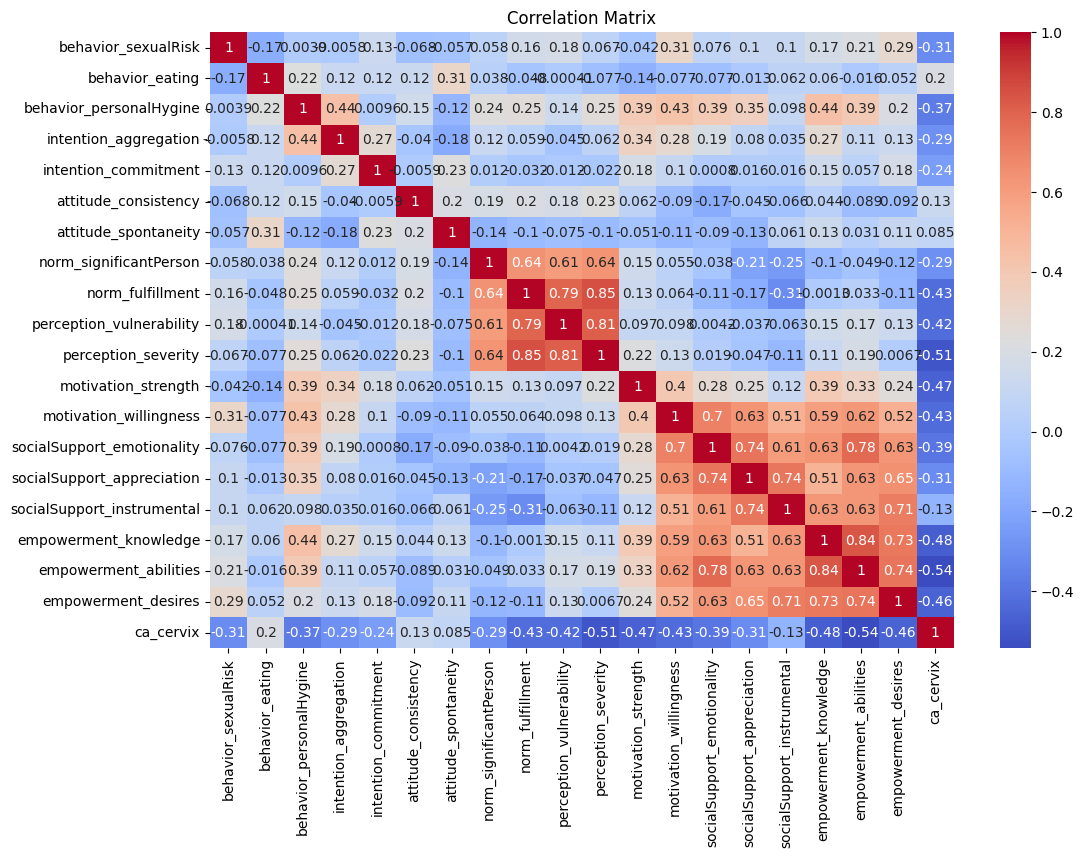

Descriptive Statistics:
       behavior_sexualRisk  behavior_eating  behavior_personalHygine  \
count            72.000000        72.000000                72.000000   
mean              9.666667        12.791667                11.083333   
std               1.186782         2.361293                 3.033847   
min               2.000000         3.000000                 3.000000   
25%              10.000000        11.000000                 9.000000   
50%              10.000000        13.000000                11.000000   
75%              10.000000        15.000000                14.000000   
max              10.000000        15.000000                15.000000   

       intention_aggregation  intention_commitment  attitude_consistency  \
count              72.000000             72.000000             72.000000   
mean                7.902778             13.347222              7.180556   
std                 2.738148              2.374511              1.522844   
min                 2.0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

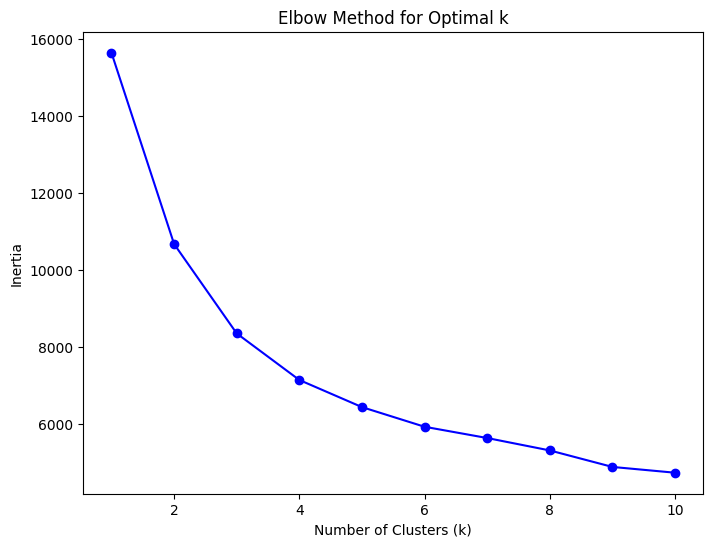

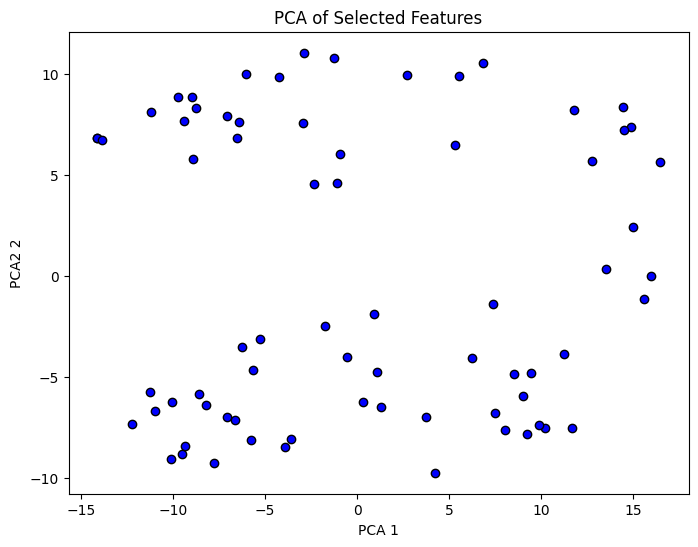

<ipython-input-140-3d5573274213>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='red', cmap='plasma')


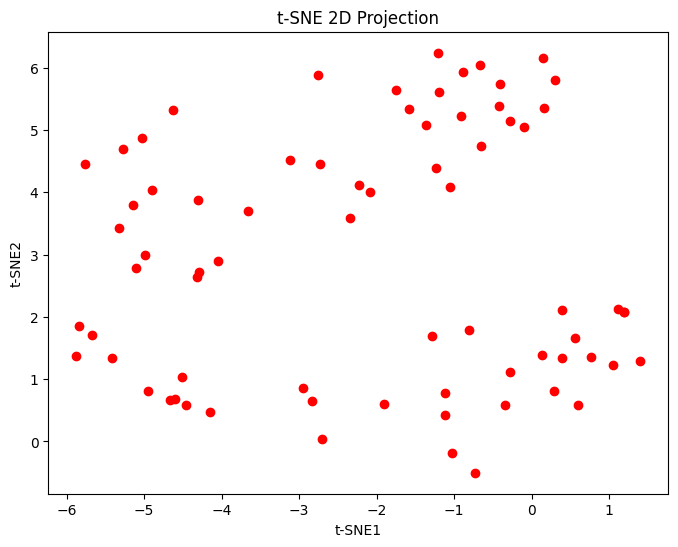

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.44127270770527566


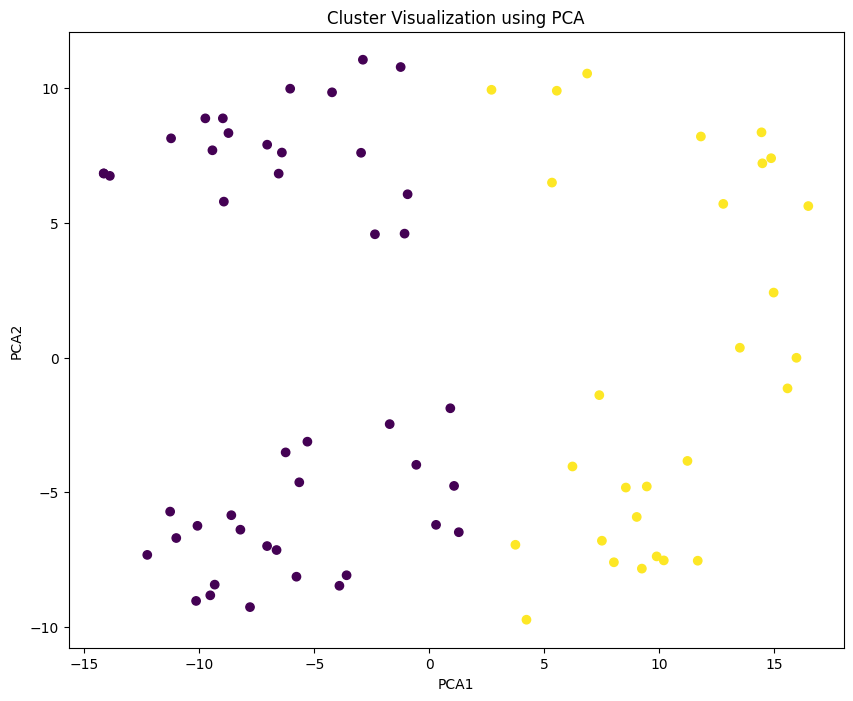

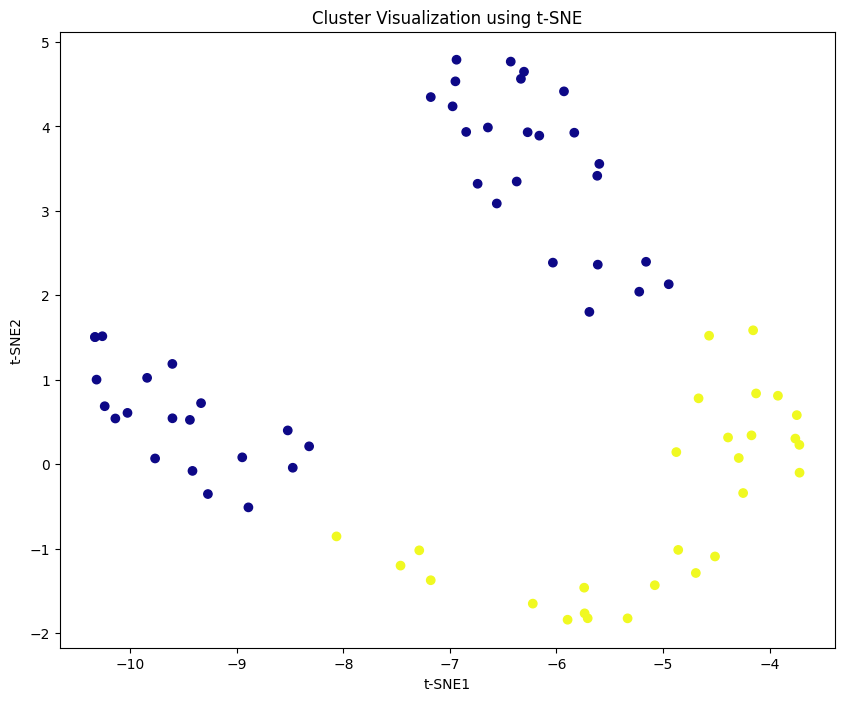

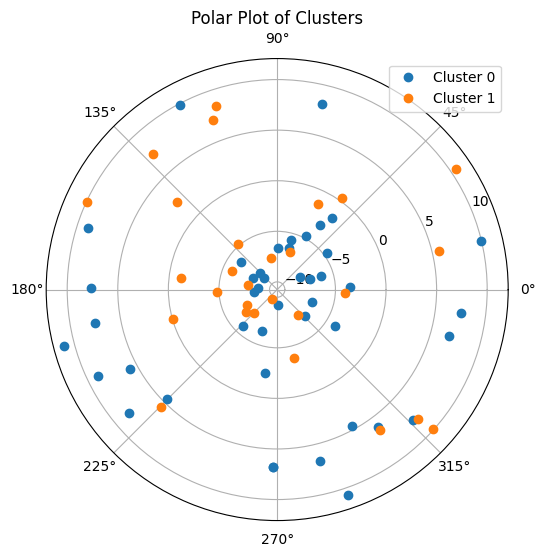

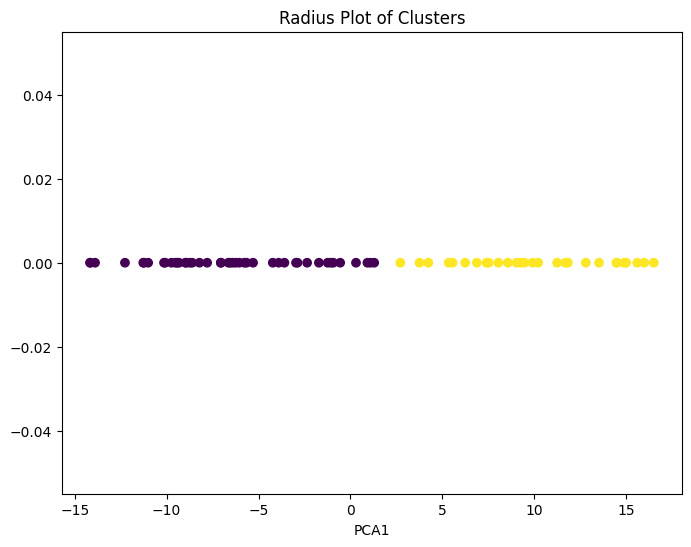

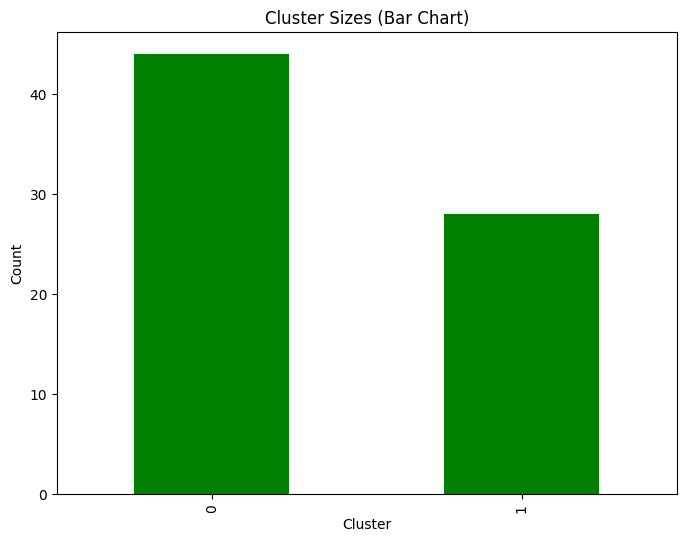

Centroids of each cluster:
Centroid of Cluster 0: [-6.41038704  0.11826905]
Centroid of Cluster 1: [10.07346535 -0.18585137]


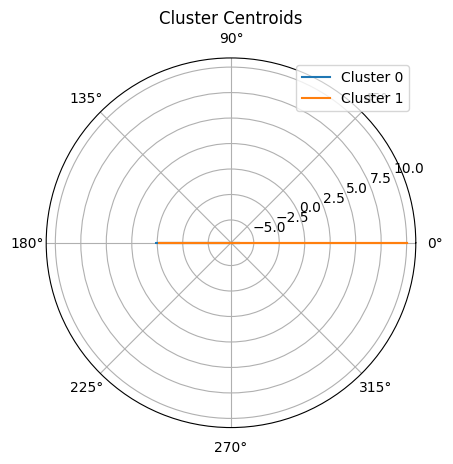

Adjusted Rand Index: 0.26409781729095766


In [166]:
masterFunction()
